# Generalized Linear Models for Categorical Data (Example 1)

### Intro and objectives


### In this lab you will learn:
1. examples of generalized linear models
2. how to fit these models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit generalized linear models
* Worked Examples
* How to interpret the results obtained

In [ ]:
!pip install statsmodels==0.13.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels
statsmodels.__version__

'0.13.5'

In [ ]:
!pip install wooldridge

import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Example.  Which programme will students choose ?

#### Entering high school students make program choices among general program, vocational program and academic program. Their choice might be modeled using several scores (e.g. reading, writing, maths), gender and their social economic status.

In [ ]:
StudentChoiceDataFrame=pd.read_stata('https://github.com/thousandoaks/M4DS202/blob/main/data/hsbdemo.dta?raw=true')

In [ ]:
StudentChoiceDataFrame.head(10)

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.0,female,low,public,vocation,34.0,35.0,41.0,29.0,26.0,not enrolled,0.0,1
1,108.0,male,middle,public,general,34.0,33.0,41.0,36.0,36.0,not enrolled,0.0,1
2,15.0,male,high,public,vocation,39.0,39.0,44.0,26.0,42.0,not enrolled,0.0,1
3,67.0,male,low,public,vocation,37.0,37.0,42.0,33.0,32.0,not enrolled,0.0,1
4,153.0,male,middle,public,vocation,39.0,31.0,40.0,39.0,51.0,not enrolled,0.0,1
5,51.0,female,high,public,general,42.0,36.0,42.0,31.0,39.0,not enrolled,0.0,1
6,164.0,male,middle,public,vocation,31.0,36.0,46.0,39.0,46.0,not enrolled,0.0,1
7,133.0,male,middle,public,vocation,50.0,31.0,40.0,34.0,31.0,not enrolled,0.0,1
8,2.0,female,middle,public,vocation,39.0,41.0,33.0,42.0,41.0,not enrolled,0.0,1
9,53.0,male,middle,public,vocation,34.0,37.0,46.0,39.0,31.0,not enrolled,0.0,1


In [ ]:
StudentChoiceDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       200 non-null    float32 
 1   female   200 non-null    category
 2   ses      200 non-null    category
 3   schtyp   200 non-null    category
 4   prog     200 non-null    category
 5   read     200 non-null    float32 
 6   write    200 non-null    float32 
 7   math     200 non-null    float32 
 8   science  200 non-null    float32 
 9   socst    200 non-null    float32 
 10  honors   200 non-null    category
 11  awards   200 non-null    float32 
 12  cid      200 non-null    int16   
dtypes: category(5), float32(7), int16(1)
memory usage: 9.0 KB


In [ ]:
StudentChoiceDataFrame.groupby('prog').count()

,id,female,ses,schtyp,read,write,math,science,socst,honors,awards,cid
prog,,,,,,,,,,,,
general,45,45,45,45,45,45,45,45,45,45,45,45
academic,105,105,105,105,105,105,105,105,105,105,105,105
vocation,50,50,50,50,50,50,50,50,50,50,50,50


### 1. Exploratory Data Analysis

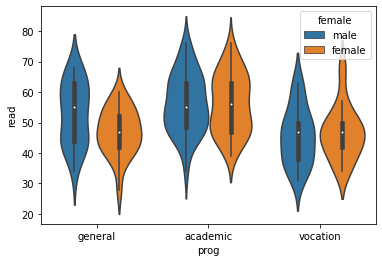

In [ ]:
sns.violinplot(data=StudentChoiceDataFrame,x="prog",y="read",hue='female')

#### The previous figure reveals that larger levels of read lead to the academic programme selection, irrespective of gender

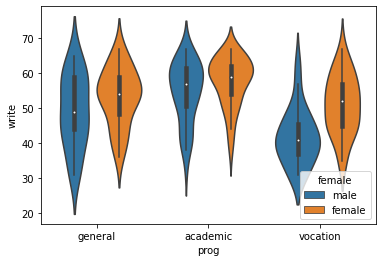

In [ ]:
sns.violinplot(data=StudentChoiceDataFrame,x="prog",y="write",hue='female')

#### The previous figure reveals that larger levels of write lead to the academic programme selection, irrespective of gender

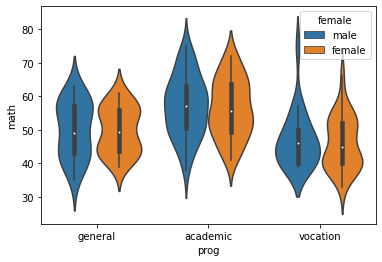

In [ ]:
sns.violinplot(data=StudentChoiceDataFrame,x="prog",y="math",hue='female')

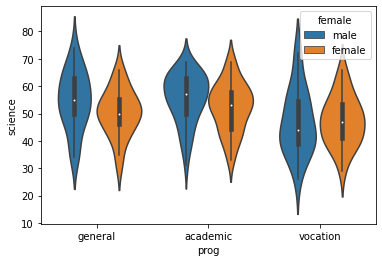

In [ ]:
sns.violinplot(data=StudentChoiceDataFrame,x="prog",y="science",hue='female')

#### The previous figure reveals that larger levels of math lead to the academic programme selection, irrespective of gender

#### We need to code categorical variables "female" and "ses" for further analysis

In [ ]:

StudentChoiceDataFrame['ses_coded']=StudentChoiceDataFrame['ses'].replace(['low', 'middle','high'],[0, 1,2])

StudentChoiceDataFrame['female_coded']=StudentChoiceDataFrame['female'].replace(['female', 'male'],[1, 0])


StudentChoiceDataFrame['prog_coded']=StudentChoiceDataFrame['prog'].replace(['vocation', 'general','academic'],[0, 1,2])


In [ ]:
StudentChoiceDataFrame

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid,ses_coded,female_coded,prog_coded
0,45.0,female,low,public,vocation,34.0,35.0,41.0,29.0,26.0,not enrolled,0.0,1,0,1,0
1,108.0,male,middle,public,general,34.0,33.0,41.0,36.0,36.0,not enrolled,0.0,1,1,0,1
2,15.0,male,high,public,vocation,39.0,39.0,44.0,26.0,42.0,not enrolled,0.0,1,2,0,0
3,67.0,male,low,public,vocation,37.0,37.0,42.0,33.0,32.0,not enrolled,0.0,1,0,0,0
4,153.0,male,middle,public,vocation,39.0,31.0,40.0,39.0,51.0,not enrolled,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,100.0,female,high,public,academic,63.0,65.0,71.0,69.0,71.0,enrolled,5.0,20,2,1,2
196,143.0,male,middle,public,vocation,63.0,63.0,75.0,72.0,66.0,enrolled,4.0,20,1,0,0
197,68.0,male,middle,public,academic,73.0,67.0,71.0,63.0,66.0,enrolled,7.0,20,1,0,2
198,57.0,female,middle,public,academic,71.0,65.0,72.0,66.0,56.0,enrolled,5.0,20,1,1,2


## 1. Initial model

#### We will assume that the random variable prog is an categorical outcome with three categories: "vocational","general","academic".

####  We assume a multinomial distribution

####  $P(Y=j)$ is the probability of Y belonging to any of the three categories.

#### We assume a logit function, this means that we are assuming that the log odds of the probabilities of the response variable can be modeled as a linear combination of the factors under consideration.
#### We select the category "vocational" as the base category, which gives two different equations:

$ logit(P(Y =academic))=log\frac{P(Y =academic)}{P(Y =vocational)}=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $



$ logit(P(Y =general))=log\frac{P(Y =general)}{P(Y =vocational)}=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $



## 2. Estimation of the parameters

#### Given the ordered nature of the response variable we fit an multinomial logit model,

In [ ]:
y=StudentChoiceDataFrame['prog_coded']

X=StudentChoiceDataFrame[['read','write','math','female_coded','ses_coded','science']]

In [ ]:
reg = sm.MNLogit(y, X)
reg_fit = reg.fit()
reg_fit.summary()






Optimization terminated successfully.
         Current function value: 0.928573
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             prog_coded   No. Observations:                  200
Model:                        MNLogit   Df Residuals:                      188
Method:                           MLE   Df Model:                           10
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                 0.09007
Time:                        12:52:54   Log-Likelihood:                -185.71
converged:                       True   LL-Null:                       -204.10
Covariance Type:            nonrobust   LLR p-value:                 6.216e-05
================================================================================
prog_coded=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
read            -0.0180      0.030     -0.595      0.552      -0.077       0.041
write            0.0210      0.034      0.625      0.532      -0.045       0.087
math            -0.0200      0.033     -0.613      0.540      -0.084       0.044
female_coded    -0.3486      0.491     -0.711      0.477      -1.310       0.613
ses_coded       -0.3381      0.316     -1.071      0.284      -0.957       0.281
science          0.0254      0.031      0.807      0.420      -0.036       0.087
--------------------------------------------------------------------------------
prog_coded=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
read             0.0210      0.026      0.797      0.425      -0.031       0.073
write            0.0327      0.029      1.131      0.258      -0.024       0.089
math             0.0441      0.029      1.520      0.128      -0.013       0.101
female_coded    -0.5620      0.417     -1.347      0.178      -1.380       0.256
ses_coded        0.2976      0.271      1.097      0.273      -0.234       0.830
science         -0.0822      0.028     -2.891      0.004      -0.138      -0.026
================================================================================
"""

In [ ]:
reg_fit.params

,0,1
read,-0.017956,0.021040
write,0.021026,0.032668
math,-0.020020,0.044065
female_coded,-0.348624,-0.562020
ses_coded,-0.338073,0.297606
science,0.025365,-0.082201


#### In the case of categorical responses it is easier to interpret the results in terms of odds ratios, rather than log of odds ratios

#### We compute the exponential of the coefficients

In [ ]:
odds=np.exp(reg_fit.params)
odds.rename(columns={0:'general',1:'academic'},inplace=True)
odds

,general,academic
read,0.982205,1.021263
write,1.021249,1.033207
math,0.980179,1.045050
female_coded,0.705658,0.570056
ses_coded,0.713143,1.346631
science,1.025689,0.921087


## 3. Model interpretation:

#### Based on the previous results.



### For the coefficients associated with academic (second column):


#### 1. One unit increase in the factor "read" increases the odds of being in the academic category 1.02 times. This means that students with higher levels of "read" actually DO prefer the academic programme.

#### 2. One unit increase in the factor "write" increases the odds of being in the academic category 1.03 times.

#### 3. One unit increase in the factor "math" increases the odds of being in the academic category 1.04 times.

#### 4. One unit increase in the factor "female_coded" increases the odds of being in the academic category 0.5 times. This means that females, controlling for other factors, DO NOT prefer the academic programme

#### 5. One unit increase in the factor "ses_coded" increases the odds of being in the academic category 1.34 times.

#### 6. One unit increase in the factor "science" increases the odds of being in the academic category 0.92 times. This means that students with higher levels of "science" actually DO NOT prefer the academic programme.




### For the coefficients associated with general (first column):


#### 1. One unit increase in the factor "read" increases the odds of being in the general category 0.98 times. This means that students with higher levels of "read" actually DO NOT prefer the general programme.

#### 2. One unit increase in the factor "write" increases the odds of being in the general category 1.02 times.

#### 3. One unit increase in the factor "math" increases the odds of being in the general category 0.98 times. This means that students with higher levels of "math" actually DO NOT prefer the general programme.

#### 4. One unit increase in the factor "female_coded" increases the odds of being in the general category 0.7 times. This means that females, controlling for other factors, DO NOT prefer the general programme

#### 5. One unit increase in the factor "ses_coded" increases the odds of being in the general category 0.71 times. This means that students with higher levels of socio economic status DO NOT prefer the general programme.

#### 6. One unit increase in the factor "science" increases the odds of being in the general category 1.02 times.









###4. Ex-post Analysis

#### based on the results of the  model we conclude that higher GPAs, parents with education and having studied in a private school increase the odds of applying to college.

In [ ]:
Y_predicted=reg_fit.predict(X)
Y_predicted.rename(columns={0:"Vocational",1:"General",2:"Academic"},inplace=True)

In [ ]:
Y_predicted

,Vocational,General,Academic
0,0.263983,0.193920,0.542096
1,0.226958,0.192940,0.580103
2,0.073864,0.033935,0.892201
3,0.192411,0.214744,0.592844
4,0.262515,0.215338,0.522147
...,...,...,...
195,0.238773,0.150655,0.610572
196,0.195855,0.234514,0.569632
197,0.109586,0.102843,0.787571
198,0.212716,0.148080,0.639204


In [ ]:
StudentChoiceDataFramePredictions=pd.concat([X,Y_predicted],axis=1)

In [ ]:
StudentChoiceDataFramePredictions

,read,write,math,female_coded,ses_coded,science,Vocational,General,Academic
0,34.0,35.0,41.0,1,0,29.0,0.263983,0.193920,0.542096
1,34.0,33.0,41.0,0,1,36.0,0.226958,0.192940,0.580103
2,39.0,39.0,44.0,0,2,26.0,0.073864,0.033935,0.892201
3,37.0,37.0,42.0,0,0,33.0,0.192411,0.214744,0.592844
4,39.0,31.0,40.0,0,1,39.0,0.262515,0.215338,0.522147
...,...,...,...,...,...,...,...,...,...
195,63.0,65.0,71.0,1,2,69.0,0.238773,0.150655,0.610572
196,63.0,63.0,75.0,0,1,72.0,0.195855,0.234514,0.569632
197,73.0,67.0,71.0,0,1,63.0,0.109586,0.102843,0.787571
198,71.0,65.0,72.0,1,1,66.0,0.212716,0.148080,0.639204


### 4.1. Let's explore the impact of grades and gender in the programme choice

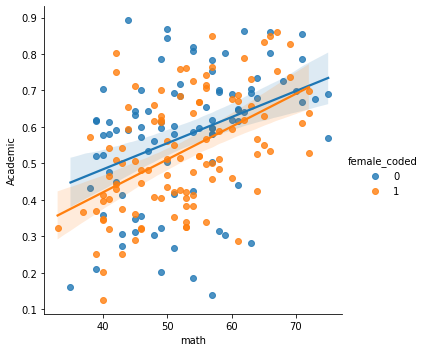

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='math',y='Academic',hue='female_coded')

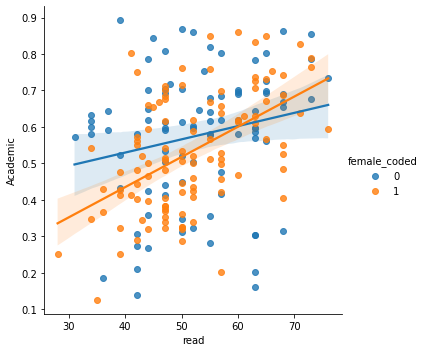

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='read',y='Academic',hue='female_coded')

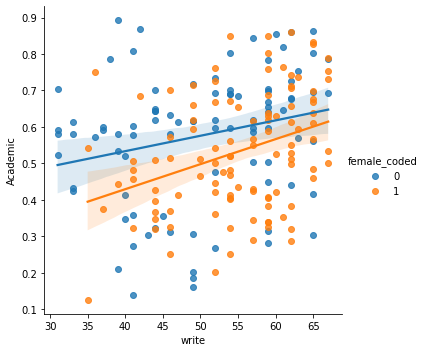

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='write',y='Academic',hue='female_coded')

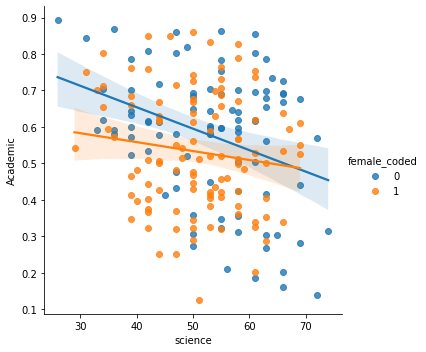

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='science',y='Academic',hue='female_coded')

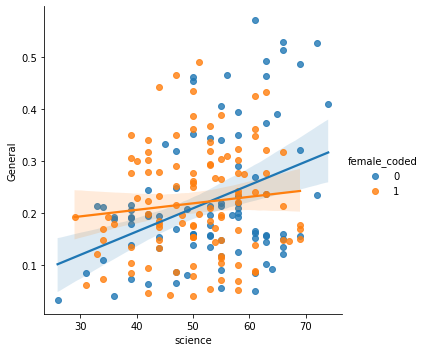

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='science',y='General',hue='female_coded')

#### Based on the previous we observe that increasing grades in writing, reading and math increases the probability of selecting an academic programme. This trend is different from men than women. Women needs higher marks to select and academic programme.


#### Higher grades in science increases the probability of applying for a general programme.




### 4.1. Let's explore the impact of grades and socio economic status in the programme choice

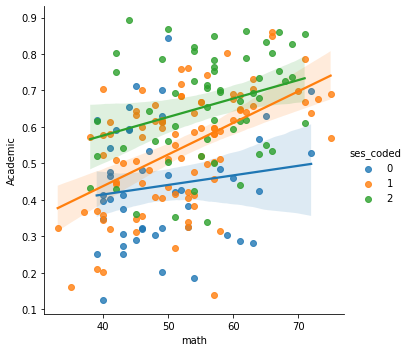

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='math',y='Academic',hue='ses_coded')

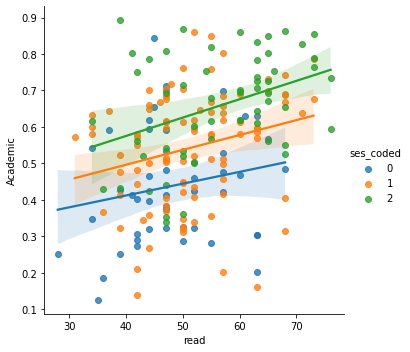

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='read',y='Academic',hue='ses_coded')

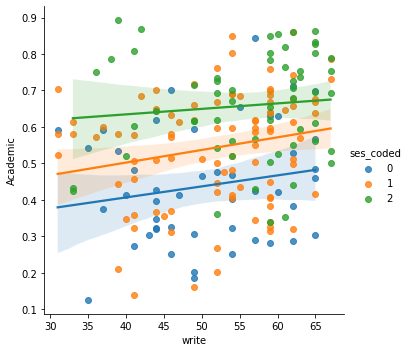

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='write',y='Academic',hue='ses_coded')

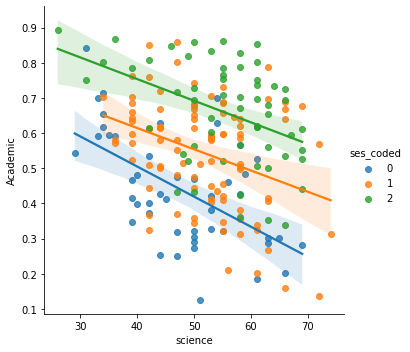

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='science',y='Academic',hue='ses_coded')

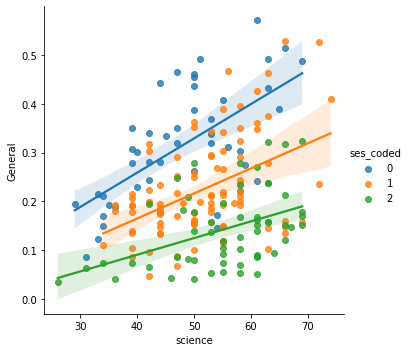

In [ ]:
sns.lmplot(data=StudentChoiceDataFramePredictions, x='science',y='General',hue='ses_coded')

#### Based on the previous we observe that increasing grades in writing, reading and math increases the probability of selecting an academic programme. This trend is moderated by the socio economic factor: higher socio economic factors increase the probability of applying for an academic programme.

#### Higher grades in science increases the probability of applying for a general programme, specially for those with lower levels of socio economic factor.
